In [1]:
from pyspark.sql import SparkSession

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
import seaborn as sns
from scipy import stats
import pymprog as pm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT','FB','V','WMT','PG','XOM','NSANY','ORCL','COST','CRM','NKE','JNJ','TMO','JPM',
          'UNH','CI','INTC','CSCO','T','KO','DIS','UPS','NFLX','GM','HLT','PFE']
multpl_stocks = web.get_data_yahoo(tickers,start = "2015-01-01", end = "2020-12-31")

In [4]:
multpl_stocks.head()

Attributes  Adj Close                                                          \
Symbols          AAPL       MSFT        AMZN       TSLA        TGT         FB   
Date                                                                            
2015-01-02  24.861401  41.443684  308.519989  43.862000  62.301720  78.449997   
2015-01-05  24.161013  41.062580  302.190002  42.018002  61.185211  77.190002   
2015-01-06  24.163294  40.459892  295.290009  42.256001  61.176929  76.150002   
2015-01-07  24.502111  40.973934  298.420013  42.189999  63.492664  76.150002   
2015-01-08  25.443539  42.179317  300.459991  42.124001  63.790409  78.180000   

Attributes                                              ...      Volume  \
Symbols             V        WMT         PG        XOM  ...        INTC   
Date                                                    ...               
2015-01-02  63.507534  74.245743  74.454414  69.679512  ...  23605600.0   
2015-01-05  62.105679  74.029671  74.100410  67.772957  ...  32785000.0   
2015-01-06  61.705475  74.600113  73.762878  67.412659  ...  30847600.0   
2015-01-07  62.532223  76.579414  74.149811  68.095718  ...  27725200.0   
2015-01-08  63.370945  78.195717  74.997749  69.229149  ...  31765400.0   

Attributes                                                            \
Symbols           CSCO           T          KO        DIS        UPS   
Date                                                                   
2015-01-02  22926500.0  20564000.0   9921100.0  5865400.0  2662900.0   
2015-01-05  29460600.0  30429100.0  26292600.0  7789400.0  3519600.0   
2015-01-06  47297600.0  29595800.0  16897500.0  6793100.0  3808900.0   
2015-01-07  27570800.0  31660000.0  13412300.0  6589500.0  1949500.0   
2015-01-08  40907000.0  22799800.0  21743600.0  7579400.0  2876100.0   

Attributes                                                 
Symbols           NFLX          GM        HLT         PFE  
Date                                                       
2015-01-02  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08   9601900.0  15206600.0  2098489.0  49169522.0  

[5 rows x 180 columns]

In [5]:
#write to csv file function 
#creates a projectcsv.csv file in the Machine Learning project folder 
multpl_stocks.to_csv('projectcsv.csv', index = False)

In [6]:
#Calculating amd plotting the returns for the stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

In [7]:
#bar chart of the standard deviation for all 30 companies for the monthly returns
rawr = multpl_stock_monthly_returns.std()

Text(0.5, 1.0, 'Average Monthly Returns Standard Deviation(2015-2020)')

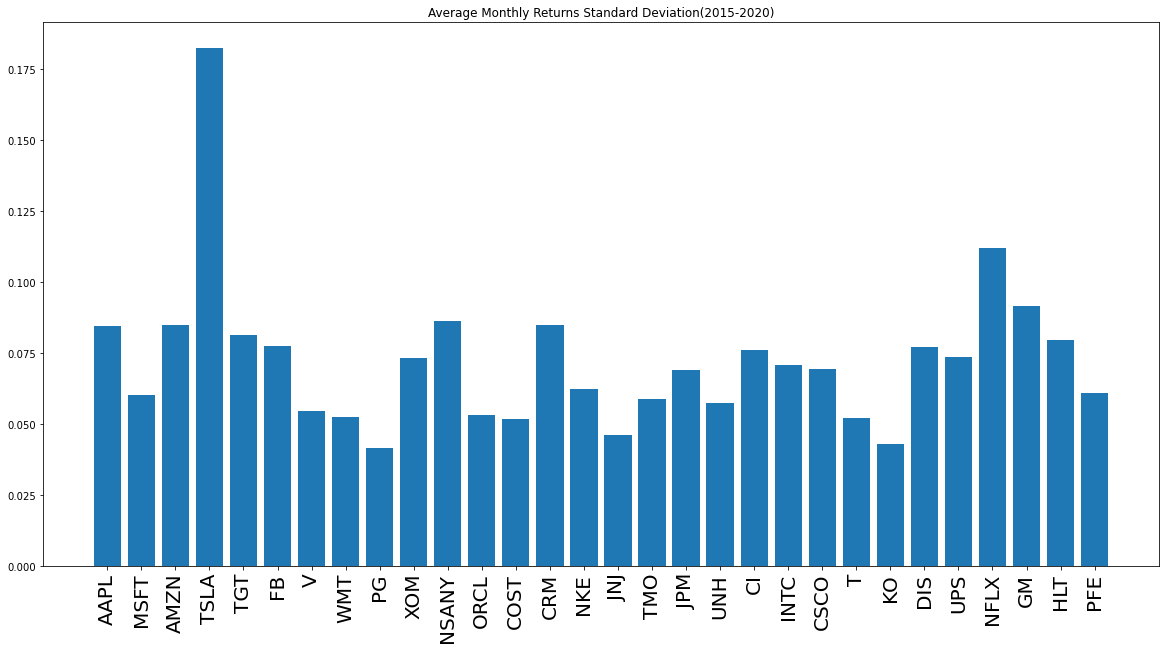

In [8]:
#fig=plt.figure(figsize=(100,50))
#plt.subplot(3,2,1)
plt.figure(figsize=(20,10))

plt.bar(tickers, rawr, align = 'center')
plt.xticks(rotation = 90, fontsize = 20)
plt.title("Average Monthly Returns Standard Deviation(2015-2020)")


#plt.rc('axes', labelsize=5)

#plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')

In [9]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
spark = SparkSession.builder.appName('MachineLearningProject').getOrCreate()

In [10]:
from pyspark.ml.feature import VectorAssembler

In [11]:
daily_variance = multpl_stock_daily_returns.std()
monthly_variance = multpl_stock_monthly_returns.std()

In [12]:
daily_var = []
for i in daily_variance:
    daily_var.append(i)

In [13]:
monthly_var = []
for i in monthly_variance:
    monthly_var.append(i)

In [14]:
#daily_var

In [15]:
#monthly_var

In [16]:
#zip() function ?
#list() function is converting values to a list

combined_var = list(zip(tickers, daily_var, monthly_var))

In [17]:
combined_var

[('AAPL', 0.018666511969575958, 0.08455165076496676),
 ('MSFT', 0.01752681206548513, 0.06016438996285532),
 ('AMZN', 0.019519465304290308, 0.08489523663458529),
 ('TSLA', 0.03474631337045932, 0.18234216338337902),
 ('TGT', 0.018498319720949008, 0.08121850945532935),
 ('FB', 0.02006667506476849, 0.07724902070174217),
 ('V', 0.016068831869514525, 0.054619815455382296),
 ('WMT', 0.01387411547410626, 0.05228565296645388),
 ('PG', 0.012275474630341256, 0.04158031797457494),
 ('XOM', 0.017460978948654213, 0.07318516415912661),
 ('NSANY', 0.01800133958539734, 0.08606276270914606),
 ('ORCL', 0.015924117336982277, 0.05316888334443483),
 ('COST', 0.01309273041490616, 0.05171175628855109),
 ('CRM', 0.021512499264814664, 0.08467742123137413),
 ('NKE', 0.017260819632940003, 0.06227927385173193),
 ('JNJ', 0.01218728393358948, 0.04621704441128958),
 ('TMO', 0.015397559095508925, 0.05861764371426903),
 ('JPM', 0.018479318428127486, 0.06886767370004829),
 ('UNH', 0.017603649717041325, 0.057441731034056

In [18]:
#creating columns for list of rows
columns = ['Tickers', 'Daily_Variance', 'Monthly_Variance']

In [19]:
#creating data frame from list of rows along with columns created
df_test = spark.createDataFrame(data = combined_var).toDF(*columns)

In [20]:
df_test.show()

+-------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|
+-------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|
|   MSFT| 0.01752681206548513| 0.06016438996285532|
|   AMZN|0.019519465304290308| 0.08489523663458529|
|   TSLA| 0.03474631337045932| 0.18234216338337902|
|    TGT|0.018498319720949008| 0.08121850945532935|
|     FB| 0.02006667506476849| 0.07724902070174217|
|      V|0.016068831869514525|0.054619815455382296|
|    WMT| 0.01387411547410626| 0.05228565296645388|
|     PG|0.012275474630341256| 0.04158031797457494|
|    XOM|0.017460978948654213| 0.07318516415912661|
|  NSANY| 0.01800133958539734| 0.08606276270914606|
|   ORCL|0.015924117336982277| 0.05316888334443483|
|   COST| 0.01309273041490616| 0.05171175628855109|
|    CRM|0.021512499264814664| 0.08467742123137413|
|    NKE|0.017260819632940003| 0.06227927385173193|
|    JNJ| 0.01218728393358948| 0.04621704441128958|
|    TMO|0.0

In [21]:
#adding output column features to previously created data frame df_test using VectorAssembler() function
#how is the features column calculated? 
assemble=VectorAssembler(inputCols = ['Daily_Variance', 'Monthly_Variance'], outputCol = 'features')

In [22]:
assembled_data = assemble.transform(df_test)

In [23]:
#need to transform original df_test with no features column to include features column before showing
assembled_data.show()

+-------+--------------------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|
+-------+--------------------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|
|      V|0.016068831869514525|0.054619815455382296|[0.01606883186951...|
|    WMT| 0.01387411547410626| 0.05228565296645388|[0.01387411547410...|
|     PG|0.012275474630341256| 0.04158031797457494|[0.01227547463034...|
|    XOM|0.017460978948654213| 0.07318516415912661|[0.01746097894865...|
|  NSANY| 0.01800133958539734| 0.08606276270914606|

In [24]:
from pyspark.ml.feature import StandardScaler

In [25]:
#creating a new column to newly features created data frame to now include standardized column
#to create standardized column need features as input column
scale = StandardScaler(inputCol = 'features', outputCol = 'standardized')

In [26]:
#scaling the scale variable previously created and using features data frame assemebled_data as argument
data_scale = scale.fit(assembled_data)

In [27]:
#now transforming features data frame to include standardized column
data_scale_output = data_scale.transform(assembled_data)

In [28]:
data_scale_output.show()

+-------+--------------------+--------------------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|        standardized|
+-------+--------------------+--------------------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|[4.10415837154811...|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|[3.85357546082270...|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|[4.29169504550805...|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|[7.63958328863109...|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|[4.06717837087327...|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|[4.41200865970228...|
|      V|0.016068831869514525|0.054619815455382296|[0.01606883186951...|[3.53301307420238...|
|    WMT| 0.01387411547410626| 0.05228565296645388|[0.013874

In [29]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [30]:
#creating empty array that going to append later on
silhouette_score = []

In [31]:
#using ClusteringEvaluator() function to be able to use KMeans() function next to be able to cluster ?
evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol = 'standardized', metricName = 'silhouette', distanceMeasure = 'squaredEuclidean')

In [32]:
#iterating from element 2-10 ? number of clusters from 
#how accurate clusters are based on number of clusters we actually have
#average distance of tickers to centroid of cluster
#smaller number the better
#Using KMeans() clustering tecnique on the lastest data frame data_scale_output
#data_scale_output is the latest data frame with features and standardized columns
for i in range (2, 10):
    KMeans_algo = KMeans(featuresCol = 'standardized', k = i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output = KMeans_fit.transform(data_scale_output)
    
    #using evaluate() function on previusly created variable evaluator
    #not sure where output and score arguments come from ?
    score = evaluator.evaluate(output)
    silhouette_score.append(score)
    print('Silhouette Score:', score)

Silhouette Score: 0.8955588602639549
Silhouette Score: 0.6050235766659905
Silhouette Score: 0.668034779592279
Silhouette Score: 0.6210656459696365
Silhouette Score: 0.5142099482427854
Silhouette Score: 0.4919962433272461
Silhouette Score: 0.5461531991483084
Silhouette Score: 0.634803174661704


In [33]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'k')

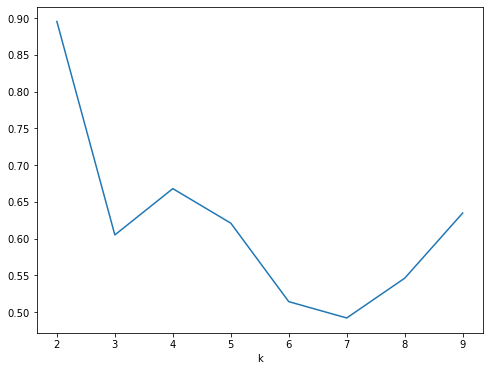

In [34]:
#creating dimensions for subplots
#silhouette_score now has appended score values 
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(range(2, 10), silhouette_score)
ax.set_xlabel('k')

In [35]:
#need to add prediction column to previusly created dataframe data_scale_output
#iterates 5 times using kmeans algorithm
KMeans_algo = KMeans(featuresCol = 'standardized', k = 5)
KMeans_fit = KMeans_algo.fit(data_scale_output)
output = KMeans_fit.transform(data_scale_output)

In [36]:
output.show()

+-------+--------------------+--------------------+--------------------+--------------------+----------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|        standardized|prediction|
+-------+--------------------+--------------------+--------------------+--------------------+----------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|[4.10415837154811...|         4|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|[3.85357546082270...|         0|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|[4.29169504550805...|         4|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|[7.63958328863109...|         1|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|[4.06717837087327...|         4|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|[4.41200865970228...|         4|
|      V|0.016068831869514525|0.054619815455382296|[0.0

In [37]:
#only picking 2 columns from latest data frame output
clustered_tickers = output['Tickers', 'prediction']

In [38]:
#showing only the first 20 rows from clustered stickers sliced data frame
clustered_tickers.show(20, False)

+-------+----------+
|Tickers|prediction|
+-------+----------+
|AAPL   |4         |
|MSFT   |0         |
|AMZN   |4         |
|TSLA   |1         |
|TGT    |4         |
|FB     |4         |
|V      |0         |
|WMT    |2         |
|PG     |2         |
|XOM    |0         |
|NSANY  |4         |
|ORCL   |0         |
|COST   |2         |
|CRM    |4         |
|NKE    |0         |
|JNJ    |2         |
|TMO    |0         |
|JPM    |0         |
|UNH    |0         |
|CI     |4         |
+-------+----------+
only showing top 20 rows



In [39]:
#clusterpredictions shows all the columns for each row value
#features and standardized columns have a DenseVector value along with it for some reason? 
#vector of daily variance and monthly variance
cluster_predictions = output.collect()

In [40]:
cluster_predictions

[Row(Tickers='AAPL', Daily_Variance=0.018666511969575958, Monthly_Variance=0.08455165076496676, features=DenseVector([0.0187, 0.0846]), standardized=DenseVector([4.1042, 3.2106]), prediction=4),
 Row(Tickers='MSFT', Daily_Variance=0.01752681206548513, Monthly_Variance=0.06016438996285532, features=DenseVector([0.0175, 0.0602]), standardized=DenseVector([3.8536, 2.2846]), prediction=0),
 Row(Tickers='AMZN', Daily_Variance=0.019519465304290308, Monthly_Variance=0.08489523663458529, features=DenseVector([0.0195, 0.0849]), standardized=DenseVector([4.2917, 3.2237]), prediction=4),
 Row(Tickers='TSLA', Daily_Variance=0.03474631337045932, Monthly_Variance=0.18234216338337902, features=DenseVector([0.0347, 0.1823]), standardized=DenseVector([7.6396, 6.924]), prediction=1),
 Row(Tickers='TGT', Daily_Variance=0.018498319720949008, Monthly_Variance=0.08121850945532935, features=DenseVector([0.0185, 0.0812]), standardized=DenseVector([4.0672, 3.0841]), prediction=4),
 Row(Tickers='FB', Daily_Vari

In [41]:
#creating empty array named clusters
clusters = []

In [42]:
#iterating through cluster_predictions row by row and appending the prediction column value to clusters empty array
for i in cluster_predictions:
    clusters.append(i['prediction'])

In [43]:
clusters

[4,
 0,
 4,
 1,
 4,
 4,
 0,
 2,
 2,
 0,
 4,
 0,
 2,
 4,
 0,
 2,
 0,
 0,
 0,
 4,
 4,
 0,
 2,
 2,
 0,
 0,
 3,
 4,
 4,
 2]

In [44]:
#converting array of prediction values to a list
#zip() function creates list 
cluster_list = list(zip(tickers, clusters))

In [45]:
cluster_list[0][1]

4

In [46]:
#creating 3 empty arrays for low risk medium risk and high risk
low_risk = []
medium_risk = []
high_risk = []

In [47]:
#appending values from the cluster_list (list of prediction values) into corresponding array based on prediction value
#if prediction value is equal to 0 it goes into low_risk array
#if prediction value is equal to 3 it goes into medium_array
#if prediction value is equal to 4 it goes into high_risk array
for i in range(len(cluster_list)):
    if cluster_list[i][1] == 2:
        low_risk.append(cluster_list[i][0])
    elif cluster_list[i][1] == 0:
        medium_risk.append(cluster_list[i][0])
    elif cluster_list[i][1] == 4:
        high_risk.append(cluster_list[i][0])

In [48]:
#So Prediction value determines which cluster (low,medium,high) risk each company goes into? 
#why is the same company in both low and medium risk array/cluster? 
#this is just to figure out which companies are in each cluster
#need to create new data frame for each cluster
low_risk

['WMT', 'PG', 'COST', 'JNJ', 'T', 'KO', 'PFE']

In [49]:
medium_risk

['MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO', 'DIS', 'UPS']

In [50]:
high_risk

['AAPL', 'AMZN', 'TGT', 'FB', 'NSANY', 'CRM', 'CI', 'INTC', 'GM', 'HLT']

In [51]:
#Cluster Analysis

In [52]:
#so the clusters only include the company names
#I need to find monthly returns of each company in the low risk cluster to be able to put values for the maximize() function
#pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit')
#I need to create data frame that ONLY has low_risk cluster companies
#Once I have that data frame I can look at the adjusted close column for that data frame and run following code
#multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
#fig = plt.figure()


In [53]:
##########################LOW RISK########################################################

In [54]:
#fetching prices for low risk stocks
tickerslowrisk = ['WMT', 'PG', 'COST', 'JNJ', 'T', 'KO', 'PFE']
multpl_stocks_lowrisk  = web.get_data_yahoo(tickerslowrisk,start = "2015-01-01", end = "2020-12-31")

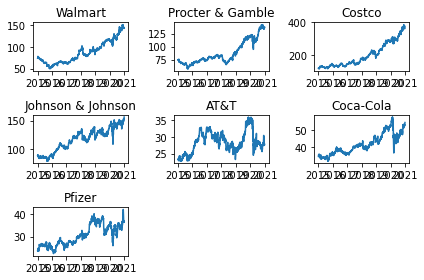

In [55]:
#chart the stock prices for low risk stocks
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax1.plot(multpl_stocks_lowrisk['Adj Close']['WMT'])
ax1.set_title("Walmart")
ax2.plot(multpl_stocks_lowrisk['Adj Close']['PG'])
ax2.set_title("Procter & Gamble")
ax3.plot(multpl_stocks_lowrisk['Adj Close']['COST'])
ax3.set_title("Costco")
ax4.plot(multpl_stocks_lowrisk['Adj Close']['JNJ'])
ax4.set_title("Johnson & Johnson")
ax5.plot(multpl_stocks_lowrisk['Adj Close']['T'])
ax5.set_title("AT&T")
ax6.plot(multpl_stocks_lowrisk['Adj Close']['KO'])
ax6.set_title("Coca-Cola")
ax7.plot(multpl_stocks_lowrisk['Adj Close']['PFE'])
ax7.set_title("Pfizer")
plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()

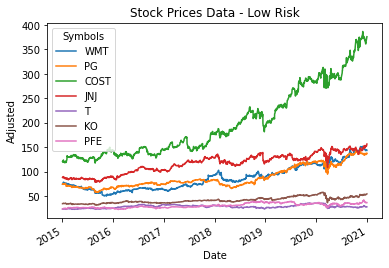

In [56]:
#plotting price trend for low risk stocks
multpl_stocks_lowrisk['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data - Low Risk')
plt.savefig('StockPricesData (Low Risk).jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

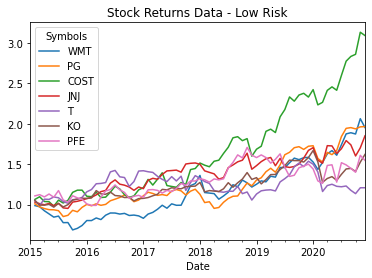

In [57]:
#Calculating amd plotting the returns for the low risk stocks
multpl_stocks_lowrisk_daily_returns = multpl_stocks_lowrisk['Adj Close'].pct_change()
multpl_stocks_lowrisk_monthly_returns = multpl_stocks_lowrisk['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stocks_lowrisk_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data - Low Risk')
plt.savefig('StockReturns(LowRisk).jpg')
plt.show()

In [61]:
#calculating daily return for each low risk stock
walmart = web.get_data_yahoo("WMT", start = "2015-01-01", end = "2020-12-31")
walmart_daily_returns = walmart['Adj Close'].pct_change()
walmart_monthly_returns = walmart['Adj Close'].resample('M').ffill().pct_change()
#print(walmart_daily_returns.head())

procter_gamble = web.get_data_yahoo("PG", start = "2015-01-01", end = "2020-12-31")
procter_gamble_daily_returns = procter_gamble['Adj Close'].pct_change()
procter_gamble_monthly_returns = procter_gamble['Adj Close'].resample('M').ffill().pct_change()
#print(procter_gamble_daily_returns.head())

costco = web.get_data_yahoo("COST", start = "2015-01-01", end = "2020-12-31")
costco_daily_returns = costco['Adj Close'].pct_change()
costco_monthly_returns = costco['Adj Close'].resample('M').ffill().pct_change()
#print(costco_daily_returns.head())

jnj = web.get_data_yahoo("JNJ", start = "2015-01-01", end = "2020-12-31")
jnj_daily_returns = jnj['Adj Close'].pct_change()
jnj_monthly_returns = jnj['Adj Close'].resample('M').ffill().pct_change()
#print(jnj_daily_returns.head())

att = web.get_data_yahoo("T", start = "2015-01-01", end = "2020-12-31")
att_daily_returns = att['Adj Close'].pct_change()
att_monthly_returns = att['Adj Close'].resample('M').ffill().pct_change()
#print(att_daily_returns.head())

coke = web.get_data_yahoo("KO", start = "2015-01-01", end = "2020-12-31")
coke_daily_returns = coke['Adj Close'].pct_change()
coke_monthly_returns = coke['Adj Close'].resample('M').ffill().pct_change()
#print(coke_daily_returns.head())

pfizer = web.get_data_yahoo("PFE", start = "2015-01-01", end = "2020-12-31")
pfizer_daily_returns = pfizer['Adj Close'].pct_change()
pfizer_monthly_returns = pfizer['Adj Close'].resample('M').ffill().pct_change()
#print(pfizer_monthly_returns.head())

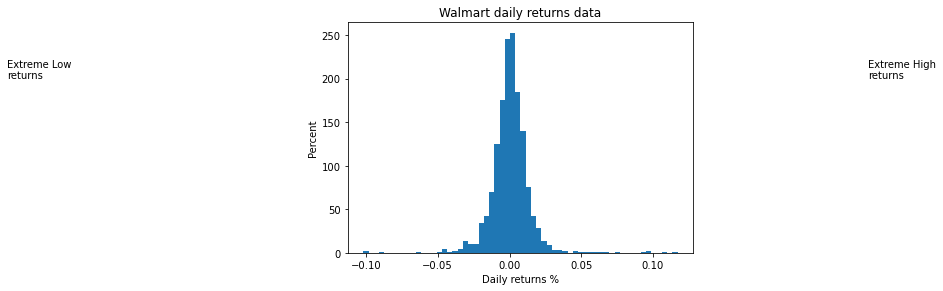

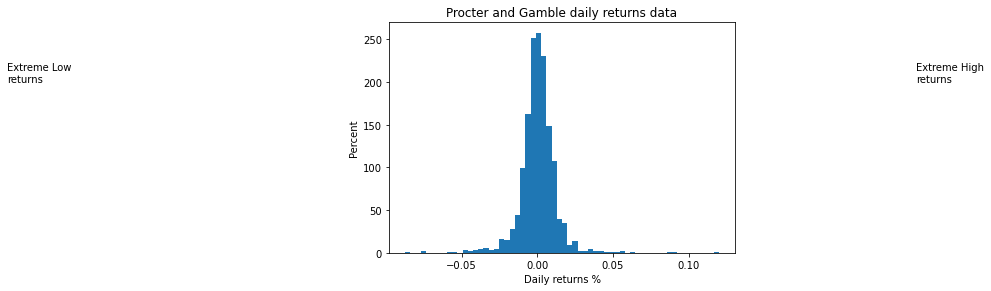

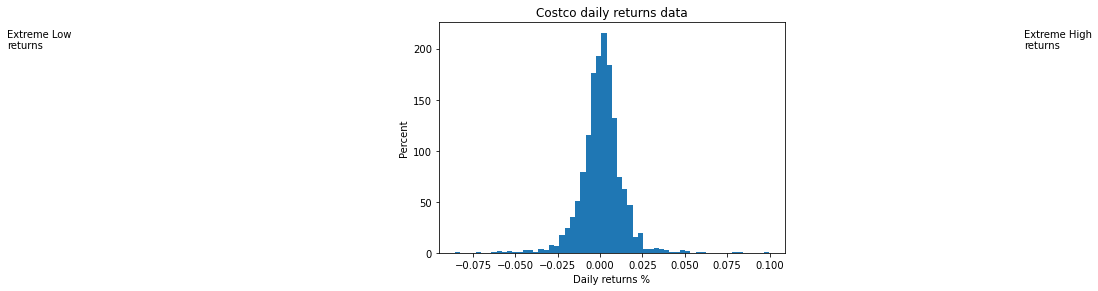

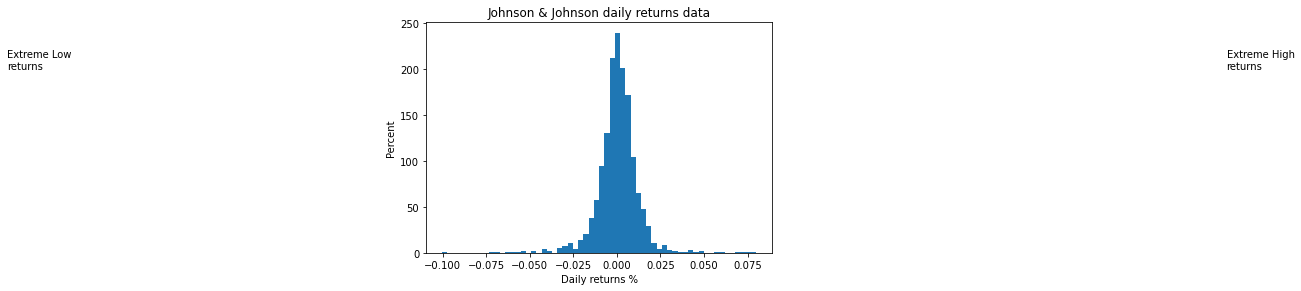

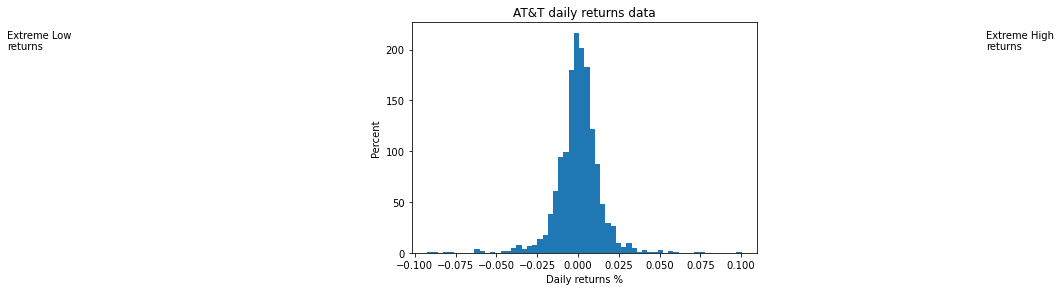

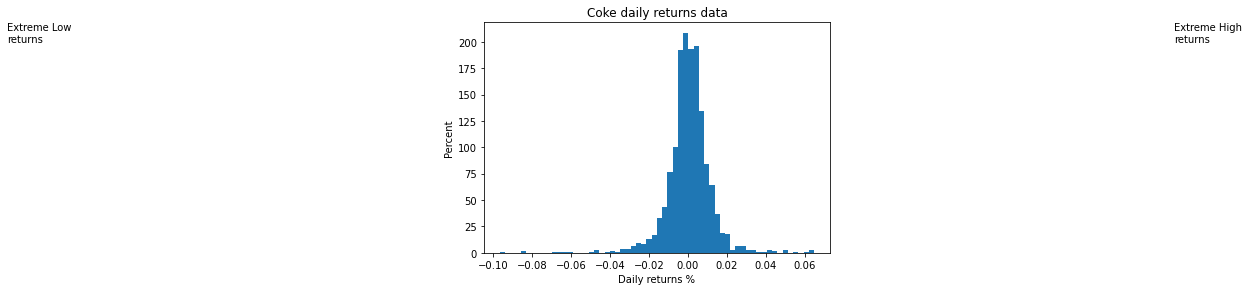

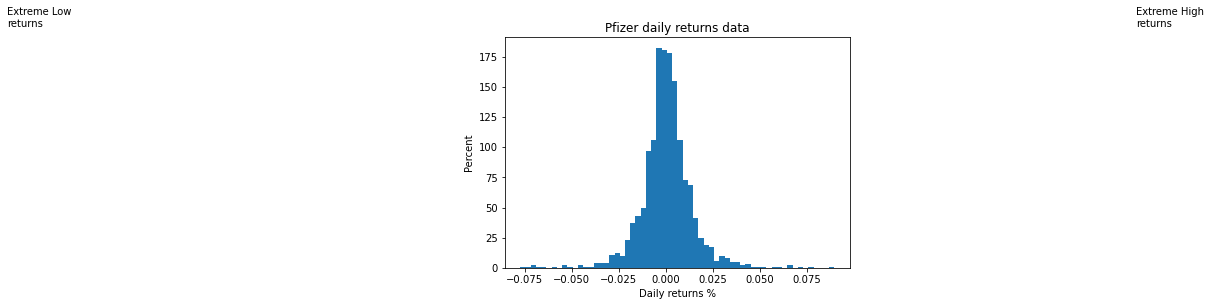

In [62]:
# Histogram to show distribution of the returns of each low risk stock around their mean
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
walmart_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Walmart daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
procter_gamble_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Procter and Gamble daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
costco_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Costco daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
jnj_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Johnson & Johnson daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.35,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
att_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("AT&T daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
coke_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Coke daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pfizer_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Pfizer daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

Symbols       WMT        PG      COST       JNJ         T        KO       PFE
Symbols                                                                      
WMT      1.000000  0.386798  0.394457  0.396067  0.130548  0.284676  0.277120
PG       0.386798  1.000000  0.407673  0.471733  0.457149  0.515162  0.256016
COST     0.394457  0.407673  1.000000  0.439720  0.353484  0.429280  0.422675
JNJ      0.396067  0.471733  0.439720  1.000000  0.383431  0.562713  0.604120
T        0.130548  0.457149  0.353484  0.383431  1.000000  0.444306  0.310133
KO       0.284676  0.515162  0.429280  0.562713  0.444306  1.000000  0.300184
PFE      0.277120  0.256016  0.422675  0.604120  0.310133  0.300184  1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

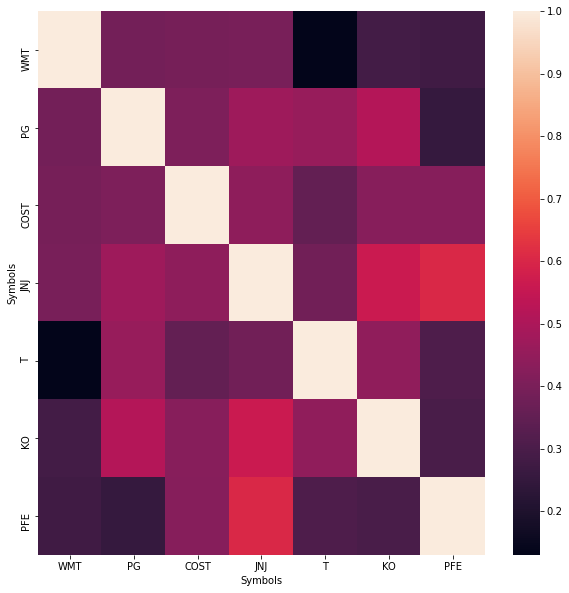

In [63]:
# Heatmap to show correlation of the returns between low risk stocks
plt.subplots(figsize=(10,10))
corr=multpl_stocks_lowrisk_monthly_returns.corr()
print(corr)
sns.heatmap(corr)

In [65]:
tickers = ['WMT', 'PG', 'COST','JNJ', 'T', 'KO', 'PFE']
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 31)
df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [66]:
#using monte carlo simulation method which finds the optimal portfolio by randomly choosing weights

def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [67]:
# generating 100,000 random portfolio matches
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)
results_frame

,ret,stdev,sharpe,WMT,PG,COST,JNJ,T,KO,PFE
0,0.105060,0.162347,0.647132,0.127612,0.009597,0.052692,0.326382,0.196230,0.007125,0.280362
1,0.140428,0.158323,0.886967,0.085928,0.231988,0.327870,0.002455,0.058395,0.283237,0.010128
2,0.142285,0.159505,0.892040,0.304930,0.080037,0.279836,0.131851,0.050259,0.105081,0.048005
3,0.117623,0.155862,0.754661,0.039537,0.078541,0.206327,0.074459,0.167631,0.187754,0.245751
4,0.111326,0.154278,0.721599,0.059922,0.116195,0.091094,0.240750,0.112026,0.256235,0.123777
...,...,...,...,...,...,...,...,...,...,...
99995,0.104030,0.155797,0.667726,0.225066,0.202706,0.002677,0.124899,0.193330,0.161741,0.089582
99996,0.136542,0.157054,0.869390,0.071389,0.314906,0.269169,0.109982,0.079309,0.019775,0.135470
99997,0.125812,0.154145,0.816192,0.094486,0.218743,0.177138,0.111993,0.044569,0.145486,0.207586
99998,0.119219,0.155948,0.764482,0.193819,0.073872,0.097195,0.195517,0.022170,0.154197,0.263230


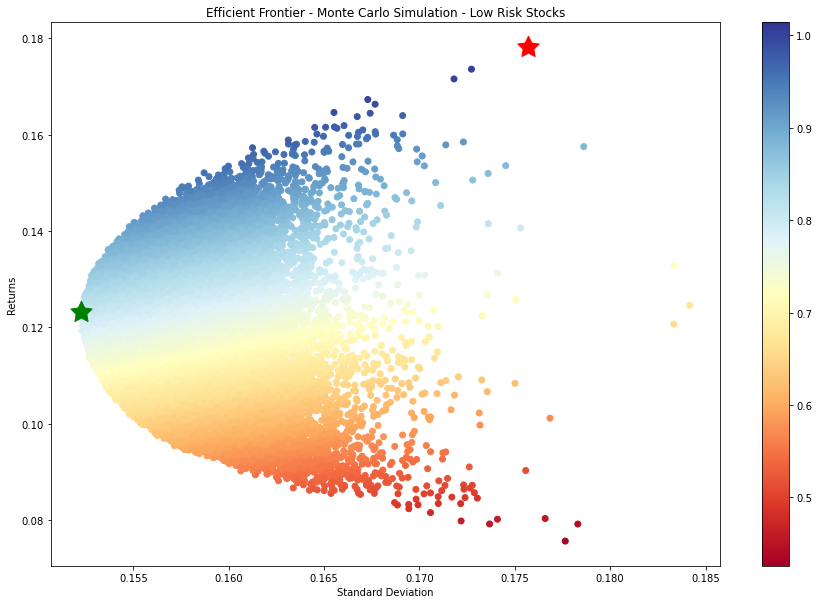

In [68]:
#locate position of portfolio from above with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient Frontier - Monte Carlo Simulation - Low Risk Stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.savefig ('montecarlosimulation-lowrisk.jpeg')
plt.show()

In [69]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,WMT,PG,COST,JNJ,T,KO,PFE
44253,0.178177,0.175698,1.014107,0.034305,0.095938,0.674594,0.089451,0.030164,0.023947,0.051601


In [70]:
##########################MEDIUM RISK########################################################

In [72]:
#fetching prices for medium risk stocks
tickersmedrisk=['MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO','DIS', 'UPS']
multpl_stocks_medrisk = web.get_data_yahoo(tickersmedrisk,start = "2015-01-01", end = "2020-12-31")

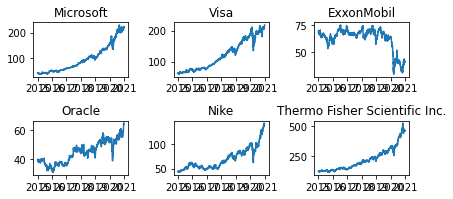

In [74]:
#chart the stock prices for each stocks
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

ax1.plot(multpl_stocks_medrisk['Adj Close']['MSFT'])
ax1.set_title("Microsoft")
ax2.plot(multpl_stocks_medrisk['Adj Close']['V'])
ax2.set_title("Visa")
ax3.plot(multpl_stocks_medrisk['Adj Close']['XOM'])
ax3.set_title("ExxonMobil")
ax4.plot(multpl_stocks_medrisk['Adj Close']['ORCL'])
ax4.set_title("Oracle")
ax5.plot(multpl_stocks_medrisk['Adj Close']['NKE'])
ax5.set_title("Nike")
ax6.plot(multpl_stocks_medrisk['Adj Close']['TMO'])
ax6.set_title("Thermo Fisher Scientific Inc.")

plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()

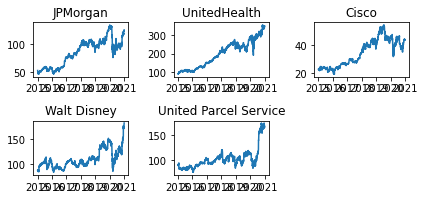

In [78]:
#chart the stock prices for each stocks
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)


ax1.plot(multpl_stocks_medrisk['Adj Close']['JPM'])
ax1.set_title("JPMorgan")
ax2.plot(multpl_stocks_medrisk['Adj Close']['UNH'])
ax2.set_title("UnitedHealth")
ax3.plot(multpl_stocks_medrisk['Adj Close']['CSCO'])
ax3.set_title("Cisco")
ax4.plot(multpl_stocks_medrisk['Adj Close']['DIS'])
ax4.set_title("Walt Disney")
ax5.plot(multpl_stocks_medrisk['Adj Close']['UPS'])
ax5.set_title("United Parcel Service")

plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()

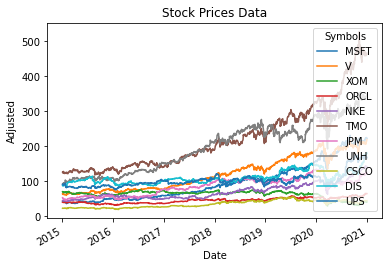

In [79]:
#plotting price trend for medium risk stocks
multpl_stocks_medrisk['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

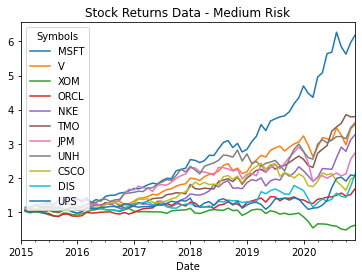

In [80]:
#Calculating amd plotting the returns for the medium risk stocks
multpl_stocks_medrisk_daily_returns = multpl_stocks_medrisk['Adj Close'].pct_change()
multpl_stocks_medrisk_monthly_returns = multpl_stocks_medrisk['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stocks_medrisk_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data - Medium Risk')
plt.savefig('StockReturns(MedRisk).jpg')
plt.show()

Symbols      MSFT         V       XOM      ORCL       NKE       TMO       JPM  \
Symbols                                                                         
MSFT     1.000000  0.675558  0.425144  0.526161  0.248600  0.423571  0.432245   
V        0.675558  1.000000  0.545646  0.457608  0.434430  0.489131  0.510151   
XOM      0.425144  0.545646  1.000000  0.488206  0.401480  0.345822  0.627999   
ORCL     0.526161  0.457608  0.488206  1.000000  0.434744  0.508407  0.482508   
NKE      0.248600  0.434430  0.401480  0.434744  1.000000  0.229232  0.427092   
TMO      0.423571  0.489131  0.345822  0.508407  0.229232  1.000000  0.352784   
JPM      0.432245  0.510151  0.627999  0.482508  0.427092  0.352784  1.000000   
UNH      0.167509  0.325021  0.433799  0.356814  0.214926  0.417737  0.427874   
CSCO     0.447538  0.591972  0.531345  0.472902  0.418530  0.343294  0.507206   
DIS      0.433257  0.588255  0.577479  0.442336  0.473120  0.293361  0.709023   
UPS      0.345291  0.331116 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

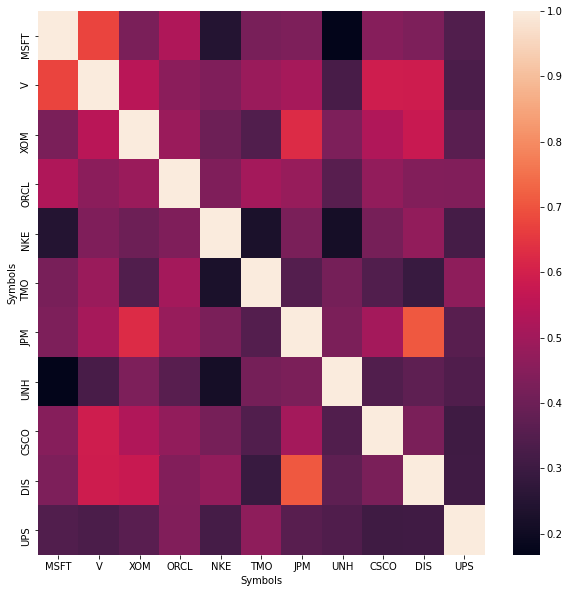

In [81]:
# Heatmap to show correlation of the returns of each stock to the other
plt.subplots(figsize=(10,10))
corr=multpl_stocks_medrisk_monthly_returns.corr()
print(corr)
sns.heatmap(corr)

In [83]:
tickers = ['MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO','DIS', 'UPS']
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 31)
df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [84]:
#using monte carlo simulation method which finds the optimal portfolio by randomly choosing weights

def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [85]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)
results_frame

,ret,stdev,sharpe,MSFT,V,XOM,ORCL,NKE,TMO,JPM,UNH,CSCO,DIS,UPS
0,0.190521,0.206402,0.923057,0.158021,0.043966,0.103207,0.087965,0.163793,0.044059,0.158680,0.104501,0.073049,0.002835,0.059923
1,0.180638,0.201692,0.895614,0.139406,0.075043,0.108375,0.033004,0.058724,0.121308,0.117574,0.037583,0.136551,0.060121,0.112310
2,0.224134,0.211440,1.060039,0.190259,0.143853,0.058136,0.012432,0.190755,0.120651,0.178714,0.067298,0.023337,0.001833,0.012735
3,0.177059,0.196693,0.900182,0.131834,0.064948,0.125458,0.020557,0.128038,0.128552,0.045629,0.017900,0.060350,0.131936,0.144797
4,0.166200,0.203063,0.818464,0.088368,0.051747,0.167424,0.025586,0.165060,0.077327,0.051035,0.070256,0.137354,0.154443,0.011399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.203376,0.206432,0.985198,0.160909,0.149842,0.061093,0.056459,0.115146,0.085406,0.181184,0.043868,0.024636,0.000872,0.120585
99996,0.203220,0.203645,0.997914,0.126542,0.036160,0.006023,0.099500,0.121040,0.064760,0.123597,0.134418,0.158072,0.013978,0.115910
99997,0.200379,0.204547,0.979622,0.177508,0.179800,0.045675,0.003126,0.117859,0.033622,0.050451,0.010561,0.105887,0.114844,0.160668
99998,0.154593,0.203780,0.758626,0.149813,0.031225,0.229236,0.063071,0.184310,0.028013,0.090563,0.049233,0.021029,0.053418,0.100089


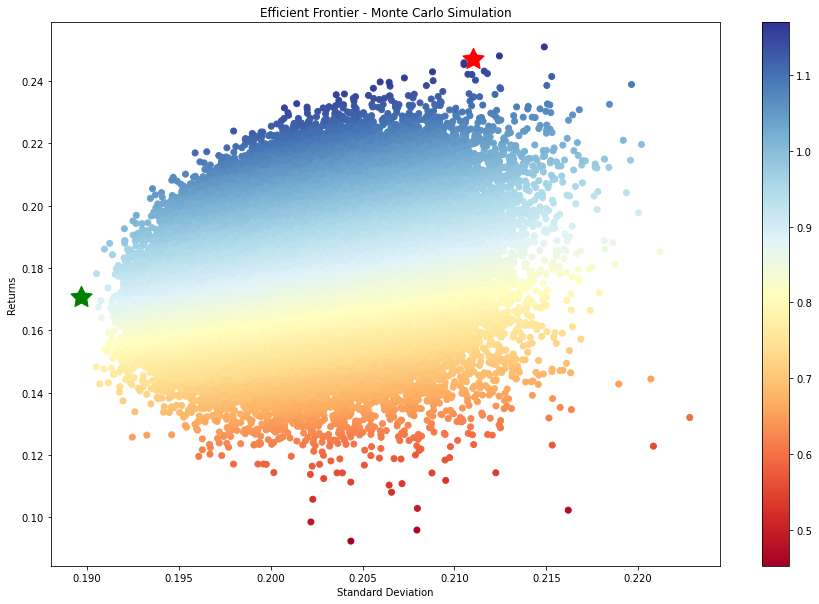

In [86]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient Frontier - Monte Carlo Simulation')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.savefig ('montecarlosimulation.jpeg')
plt.show()

In [87]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,MSFT,V,XOM,ORCL,NKE,TMO,JPM,UNH,CSCO,DIS,UPS
90690,0.246848,0.210995,1.169924,0.278978,0.179531,0.007416,0.008686,0.050907,0.158185,0.003499,0.142431,0.070526,0.063323,0.036519


In [88]:
###############################HIGH RISK#######################################

In [89]:
#fetching prices for high risk stocks
tickershighrisk=['AAPL','AMZN','TGT','FB', 'NSANY','CRM','CI','INTC', 'GM','HLT']
multpl_stocks_highrisk = web.get_data_yahoo(tickershighrisk,start = "2015-01-01", end = "2020-12-31")

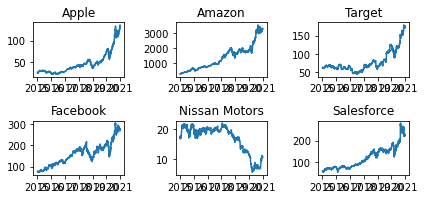

In [90]:
#chart the stock prices for each stocks
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax1.plot(multpl_stocks_highrisk['Adj Close']['AAPL'])
ax1.set_title("Apple")
ax2.plot(multpl_stocks_highrisk['Adj Close']['AMZN'])
ax2.set_title("Amazon")
ax3.plot(multpl_stocks_highrisk['Adj Close']['TGT'])
ax3.set_title("Target")
ax4.plot(multpl_stocks_highrisk['Adj Close']['FB'])
ax4.set_title("Facebook")
ax5.plot(multpl_stocks_highrisk['Adj Close']['NSANY'])
ax5.set_title("Nissan Motors")
ax6.plot(multpl_stocks_highrisk['Adj Close']['CRM'])
ax6.set_title("Salesforce")


plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()

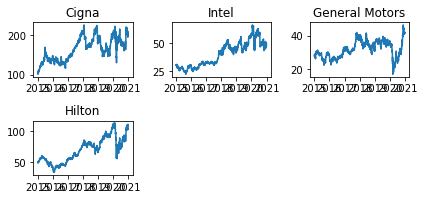

In [91]:
#chart the stock prices for each stocks
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)

ax1.plot(multpl_stocks_highrisk['Adj Close']['CI'])
ax1.set_title("Cigna")
ax2.plot(multpl_stocks_highrisk['Adj Close']['INTC'])
ax2.set_title("Intel")
ax3.plot(multpl_stocks_highrisk['Adj Close']['GM'])
ax3.set_title("General Motors")
ax4.plot(multpl_stocks_highrisk['Adj Close']['HLT'])
ax4.set_title("Hilton")

plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()

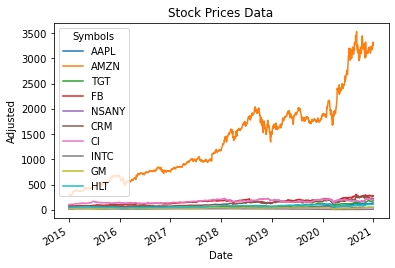

In [92]:
#plotting price trend for high risk stocks
multpl_stocks_highrisk['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

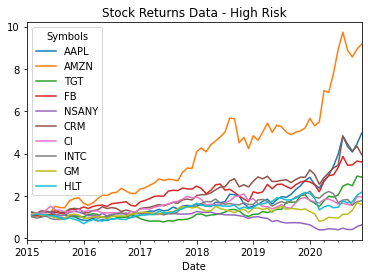

In [93]:
#Calculating amd plotting the returns for the high risk stocks
multpl_stocks_highrisk_daily_returns = multpl_stocks_highrisk['Adj Close'].pct_change()
multpl_stocks_highrisk_monthly_returns = multpl_stocks_highrisk['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stocks_highrisk_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data - High Risk')
plt.savefig('StockReturns(HighRisk).jpg')
plt.show()

Symbols      AAPL      AMZN       TGT        FB     NSANY       CRM        CI  \
Symbols                                                                         
AAPL     1.000000  0.455936  0.303657  0.514251  0.467853  0.546987  0.221342   
AMZN     0.455936  1.000000  0.128286  0.573966  0.300933  0.584145  0.142537   
TGT      0.303657  0.128286  1.000000  0.313463  0.279746  0.268887  0.304346   
FB       0.514251  0.573966  0.313463  1.000000  0.411176  0.541806  0.247172   
NSANY    0.467853  0.300933  0.279746  0.411176  1.000000  0.522073  0.380556   
CRM      0.546987  0.584145  0.268887  0.541806  0.522073  1.000000  0.194587   
CI       0.221342  0.142537  0.304346  0.247172  0.380556  0.194587  1.000000   
INTC     0.397819  0.269685  0.088184  0.146036  0.410188  0.351186  0.227102   
GM       0.401349  0.199782  0.334172  0.520059  0.664595  0.452056  0.431956   
HLT      0.414530  0.246242  0.463448  0.329123  0.496636  0.499466  0.387399   

Symbols      INTC        GM

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

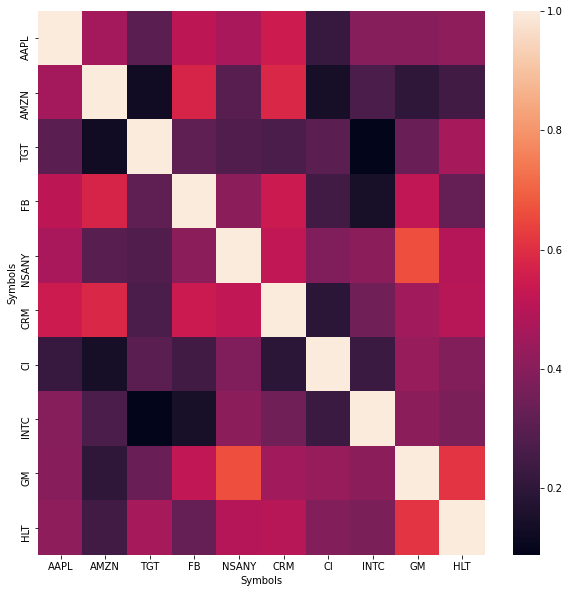

In [94]:
# Heatmap to show correclation of the returns of each stock to the other
plt.subplots(figsize=(10,10))
corr=multpl_stocks_highrisk_monthly_returns.corr()
print(corr)
sns.heatmap(corr)

In [96]:
tickers = ['AAPL','AMZN','TGT','FB', 'NSANY','CRM','CI','INTC', 'GM','HLT']
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 31)
df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [97]:
#using monte carlo simulation method which finds the optimal portfolio by randomly choosing weights

def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [98]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)
results_frame

,ret,stdev,sharpe,AAPL,AMZN,TGT,FB,NSANY,CRM,CI,INTC,GM,HLT
0,0.251536,0.228962,1.098590,0.139577,0.130780,0.047481,0.112897,0.013742,0.216265,0.022718,0.198073,0.023093,0.095375
1,0.139666,0.212235,0.658072,0.014157,0.038219,0.031205,0.057395,0.254102,0.134517,0.098025,0.197625,0.079271,0.095485
2,0.182455,0.209524,0.870807,0.107711,0.095207,0.067584,0.003576,0.148827,0.084522,0.070013,0.125002,0.159739,0.137819
3,0.248275,0.210996,1.176681,0.193562,0.170037,0.101665,0.040005,0.032439,0.064258,0.148264,0.012804,0.133037,0.103931
4,0.225793,0.211382,1.068174,0.114040,0.088249,0.153634,0.169900,0.076721,0.137015,0.005865,0.111065,0.062362,0.081149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.184369,0.210915,0.874136,0.143180,0.065643,0.044100,0.170611,0.184805,0.026547,0.031415,0.055299,0.121506,0.156894
99996,0.181266,0.212060,0.854788,0.006812,0.040332,0.193502,0.004455,0.100827,0.214786,0.043715,0.109290,0.190215,0.096064
99997,0.233239,0.205882,1.132877,0.193238,0.157447,0.134545,0.033040,0.090154,0.051388,0.169550,0.010077,0.105951,0.054610
99998,0.211273,0.214141,0.986607,0.199625,0.137460,0.006506,0.030299,0.132436,0.060603,0.147378,0.131275,0.081813,0.072606


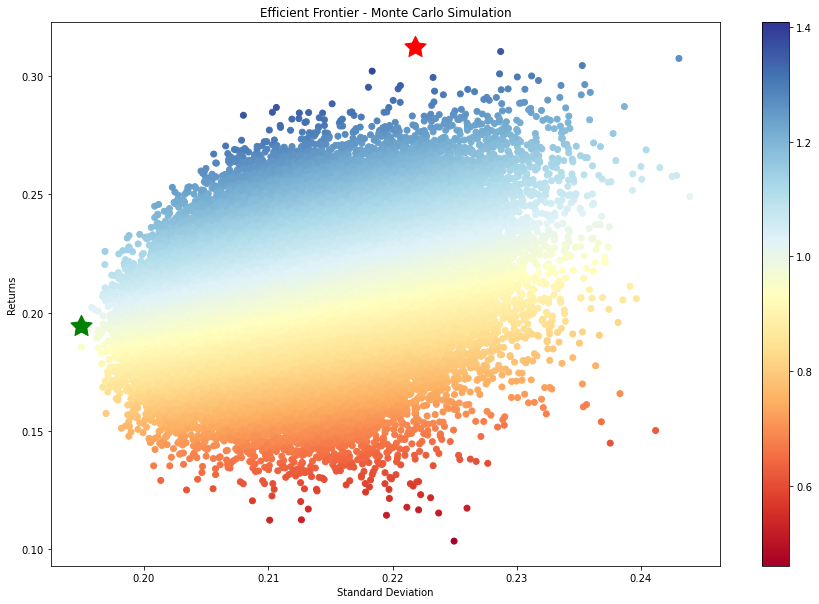

In [99]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient Frontier - Monte Carlo Simulation')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.savefig ('montecarlosimulation.jpeg')
plt.show()

In [100]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,AMZN,TGT,FB,NSANY,CRM,CI,INTC,GM,HLT
6479,0.312397,0.221849,1.40815,0.221712,0.324445,0.200966,0.014371,0.01601,0.12879,0.063891,0.016043,0.003095,0.010678
